In [1]:
from data import load_data
import sklearn
import pickle
import numpy as np 
import torch 
from ClassificationModels.CNN_T import ResNetBaseline, get_all_preds, fit, UCRDataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import os 
from ClassificationModels.ResNet import Classifier_RESNET
from ClassificationModels.CNN import Classifier_CNN

2022-05-23 11:28:33.797510: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-23 11:28:33.797527: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Parameters

In [2]:
dataset='ElectricDevices'

# Load Data

In [3]:
train_x,test_x, train_y, test_y = load_data.load_basic_dataset(dataset,scaling=None,mode='time',cwd='/media/jacqueline/Data/UCRArchive_2018/')

In [4]:
print(train_x.shape)
print(test_x.shape)

(8926, 96, 1)
(7711, 96, 1)


In [5]:
train_x.shape

(8926, 96, 1)

In [6]:
train_y.shape

(8926,)

# Load Model

In [7]:

import tensorflow as tf 
model_to_explain = tf.keras.models.load_model(f'./ClassificationModels/models/{dataset}/cnn/best_model.hdf5')

2022-05-23 11:28:34.920731: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-23 11:28:34.921045: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-23 11:28:34.921099: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-05-23 11:28:34.921147: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-05-23 11:28:34.921205: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

# Explanation Algo

In [8]:
explained_instance = train_x[0]
nb_interpretable_feature = 10
explanation_size = 5
nb_neighbors = 1000
learning_process_name = 'Lime'
transform_name = 'straight_line'

In [9]:
from InterpretabilityModels.leftist.LEFTIST import LEFTIST
from InterpretabilityModels.leftist.timeseries.segmentator.uniform_segmentator import UniformSegmentator

In [10]:
segmentator = UniformSegmentator(nb_interpretable_feature)
leftist = LEFTIST(test_x,'straight_line',segmentator,model_to_explain,learning_process_name,mode='time',backend='tf')

In [11]:
explanations = leftist.explain(np.array(explained_instance),1000,explanation_size=explanation_size)

Instance (96, 1)
nb_features 10
nb_neighbors 1000
NM [[1 1 1 ... 1 1 0]
 [0 0 1 ... 0 0 0]
 [0 1 1 ... 1 0 0]
 ...
 [0 1 0 ... 1 0 1]
 [1 0 0 ... 1 0 1]
 [0 1 1 ... 1 0 1]]
masks : 
 [[1 1 1 ... 1 1 1]
 [0 0 1 ... 0 0 0]
 [0 1 1 ... 1 0 0]
 ...
 [0 1 0 ... 1 0 1]
 [1 0 0 ... 1 0 1]
 [0 1 1 ... 1 0 1]] 
 kernel_weights : 
 None 
 values : 
 None 
 proba_labels : 
 None 
 
NV [[[-0.18610903]
  [-0.18610903]
  [-0.18610903]
  ...
  [-0.18610903]
  [-0.18610903]
  [-0.18610903]]

 [[-0.18610903]
  [-0.18600903]
  [-0.18590903]
  ...
  [ 1.18640795]
  [ 0.50014946]
  [-0.18610903]]

 [[-0.18610903]
  [-0.18600903]
  [-0.18590903]
  ...
  [ 1.18640795]
  [ 0.50014946]
  [-0.18610903]]

 ...

 [[-0.18610903]
  [-0.18600903]
  [-0.18590903]
  ...
  [-0.18610903]
  [-0.18610903]
  [-0.18610903]]

 [[-0.18610903]
  [-0.18610903]
  [-0.18610903]
  ...
  [-0.18610903]
  [-0.18610903]
  [-0.18610903]]

 [[-0.18610903]
  [-0.18600903]
  [-0.18590903]
  ...
  [-0.18610903]
  [-0.18610903]
  [-0.18610

2022-05-23 11:28:35.506440: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


(1000, 96, 1)


[-0.01472006 -0.01298094  0.          0.          0.          0.
  0.          0.02521981  0.29471667  0.72343729]
-0.014720055722884765
0.0
-0.0129809382482099
9.6
0.0
19.2
0.0
28.799999999999997
0.0
38.4
0.0
48.0
0.0
57.599999999999994
0.025219805672746957
67.2
0.29471666913632283
76.8
0.7234372899757087
86.39999999999999


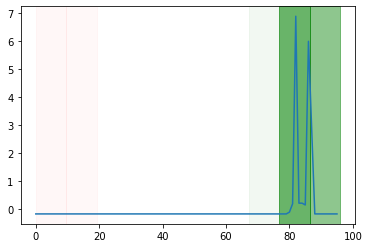

In [12]:
%matplotlib inline
leftist.plot_on_sample(explained_instance.flatten(),explanations)